# Time-Resolved Photo-Luminescence del PbS 900

Questo fit non vuole proprio venire!

Devo leggere tre file. La funzione che se ne occupa in qp2_subroutines è scritta con wrangler.

In [19]:
cartella = 'data/TRPL_PbS900/'
nome1 = 'PbS900_ex-nkt750_em-928e25_50ns_binw100ps_180s.csv'
nome2 = 'PbS900_ex-nkt750_em-928e25_50ns_binw100ps_1800s.csv'
nome3 = 'PbS900_ex-nkt750_em-930e25_1800s_highres.csv'

nomi = [nome1, nome2, nome3]

Capire cosa indicano tutti questi parametri nel nome del file!

## Importazioni

In [20]:
from qp2_subroutines import *
import os

In [21]:
os.getcwd() 

'/Users/zosojack/lab-ss/QP2'

## Preliminari

Servirà dopo per i colori nei grafici.

In [22]:
col = ['red', 'green', 'magenta', 'purple', 'peru', 'cyan', 
       'olive', 'goldenrod', 'black', 'sienna', 'steelblue', 'crimson']

---

---

# Analisi

#### Cntenitore per i dati

In [23]:
PbS_trpl = []

#### Lettura dei file

In [24]:
for nome in nomi:
    # estraggo dati dai file e raccolgo
    nome = cartella + nome
    time, counts, curva1, curva2 = read_trpl_csv(nome) 
    PbS_trpl.append((time, counts, curva1, curva2))

---

In [26]:
params = [
    [0.25, 50000, 0.53, 10, 10, 0.2],
    [1, 7e04, 1, 3e04, 10, 0.2],
    [1, 7e04, 1, 3e04, 10, 0.2],
]

#### Plotto la prima delle due colonne

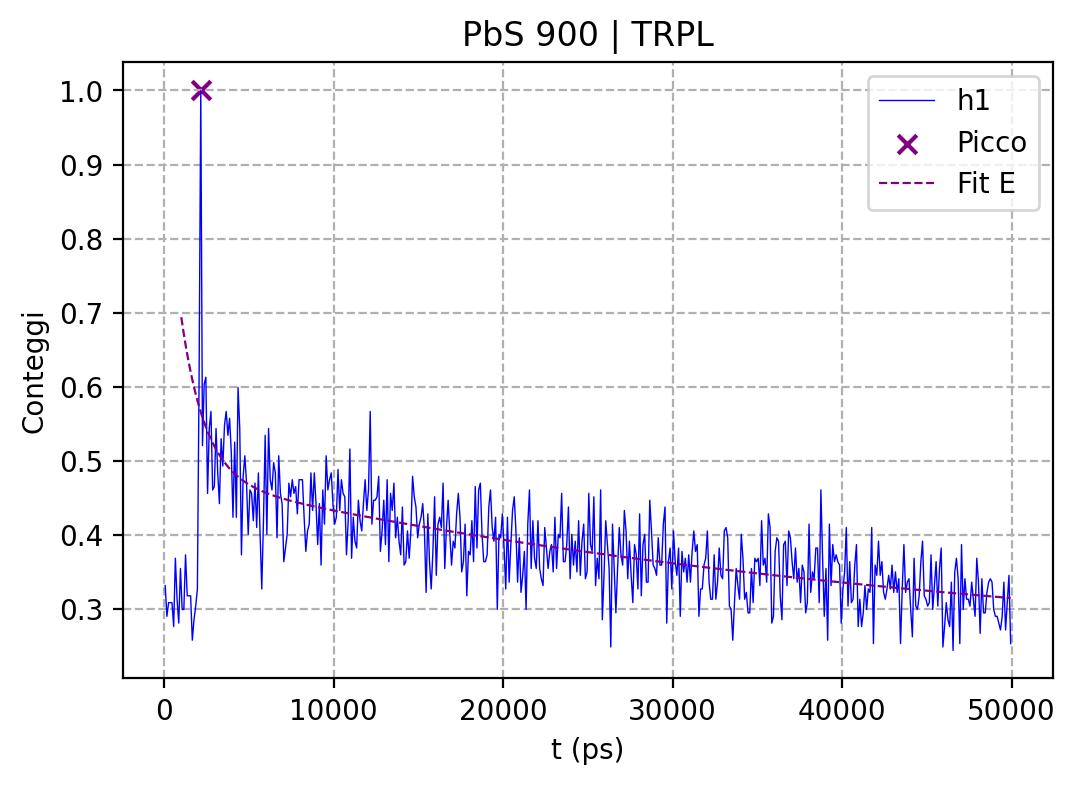

Fit 1 | -------------------
 - $a_1$ = 0.26927329229192026
 - $\tau_1$ = 48667.875605044705
 - $a_2$ = 1.8958103255995444
 - $\tau_2$ = 1402.9624080641102
 - $\Delta_x$ = -2031.050174094702
 - $\Delta_y$ = 0.22242182927169868
 - $\chi_2/ndf$ = 0.004816298958004133


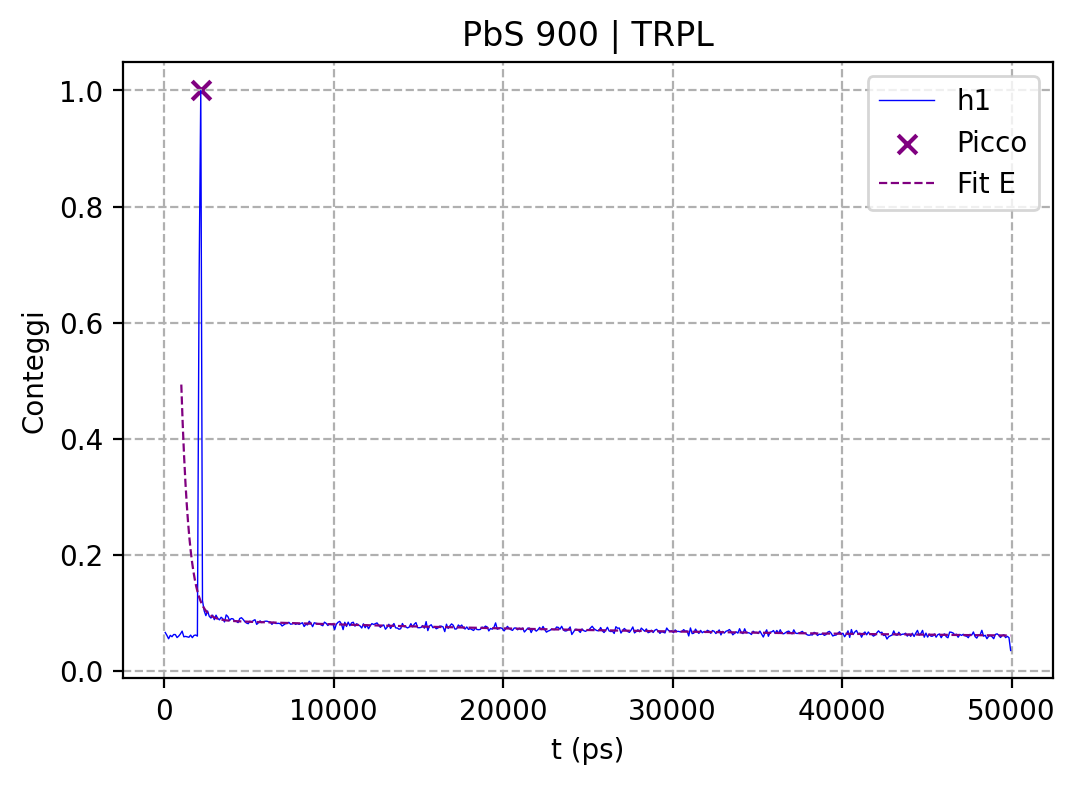

Fit 1 | -------------------
 - $a_1$ = 0.037603700666189836
 - $\tau_1$ = 34987.026373892615
 - $a_2$ = 3.282672490046539
 - $\tau_2$ = 453.17197118520403
 - $\Delta_x$ = 51.54863512271969
 - $\Delta_y$ = 0.051689998542367624
 - $\chi_2/ndf$ = 0.00014695313473813635


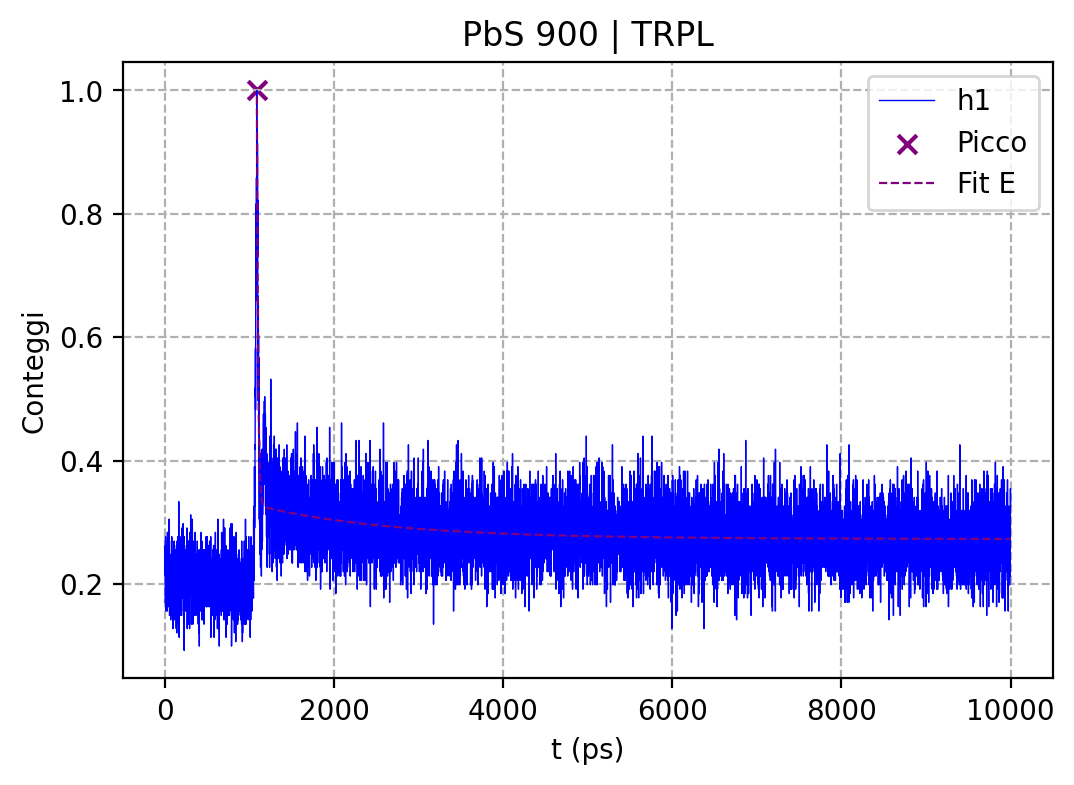

Fit 1 | -------------------
 - $a_1$ = 0.057761495691626565
 - $\tau_1$ = 1601.8949837593739
 - $a_2$ = 479.89304536448196
 - $\tau_2$ = 14.527566987222757
 - $\Delta_x$ = 990.4308007235701
 - $\Delta_y$ = 0.27279434913184064
 - $\chi_2/ndf$ = 0.007765278162030278


In [ ]:
for i, quadrupla in enumerate(PbS_trpl):
    time = quadrupla[0]
    curva1 = quadrupla[2]
    curva2 = quadrupla[3]
    
    # normalizzo i counts
    maximum1 = np.max(curva1)
    maximum2 = np.max(curva2)
    curva1 = curva1 / maximum1
    curva2 = curva2 / maximum2


    # Plot
    plt.figure(figsize=(6,4), dpi=200)
    plt.plot(time, curva1, linestyle='-', color='b', linewidth=0.5, label='h1')#, zorder=1)
    #plt.plot(time, curva2, linestyle='-', color='r', linewidth=0.5, label='h2')#, zorder=1)
    
    
    ## FIT DOPPIO ESPONENZIALE ##
    
    sup = max(time)-1
    j = np.argmax(curva1)
    #l = np.argmax(curva2)
    
    # per capire dove secondo lui c'è il massimo di curve1
    x_picco = time[j]
    y_picco = curva1[j]
    plt.scatter(x_picco, y_picco, 
                color=col[3], marker='x',
                label='Picco', s=45)
        
        
    inf1 = time[j]
    #inf2 = time[l] - 100
    # isolo regione fit
    mask = (time > inf1) & (time < sup)
    x_fit = time[mask]
    y_fit1 = curva1[mask]
    #y_fit2 = curva2[mask]

    # parametri (a1, tau1, a2, tau2)
    par = [1, 1750, 1, 12]
    par.append(10) # il delta_x
    par.append(0.2) # il delta_y
    # usando risultato terzo fit
    #par = [0.07565398747075835, 2265.6438665046385, 5250554992968956.0, 29.236927103129098, 0, 0.26338796610139725]
    
    #par = params[i]
    
    low = [0, 0, 0, 0]
    low.append(-np.inf) # inf delta_x
    low.append(0) # inf delta_y
    upp = [np.inf, np.inf, np.inf, np.inf]
    upp.append(10000) # sup delta_x
    upp.append(0.5) # sup delta_y
    
    popt1, pcov1 = curve_fit(doppio_esponenziale, x_fit, y_fit1, sigma=np.sqrt(y_fit1), p0=par, bounds=(low,upp))
    #popt2, pcov2 = curve_fit(doppio_esponenziale, x_fit, y_fit2, sigma=np.sqrt(y_fit2), p0=par, bounds=(low,upp))
    
    ## PLOT CURVA FIT ##
    x_plot = np.linspace(1000, sup, 30000)
    y_plot1 = doppio_esponenziale(x_plot, *popt1)
    # plotto solo 0 < y < 1
    mask = (y_plot1 > 0) & (y_plot1 < 1)
    x_plot = x_plot[mask]
    y_plot1 = y_plot1[mask]
    #y_plot2 = doppio_esponenziale(x_plot, *popt2)
    plt.plot(x_plot, y_plot1, linestyle='--', color=col[3], label=f"Fit E", linewidth=0.8)#, zorder=2)
    #plt.plot(x_plot, y_plot2, linestyle='--', color=col[4], label=f"Fit T", linewidth=0.8)#, zorder=2)
    
    ## OPZIONI GRAFICHE ##
    plt.title(r'PbS 900 | TRPL')
    plt.xlabel("t (ps)")
    #plt.xscale('log')
    plt.ylabel("Conteggi")
    #plt.ticklabel_format(axis='x',style='scientific', useMathText=True, scilimits=(0,0) )
    plt.legend()
    plt.grid(linestyle='--')
    #plt.tight_layout()
    plt.show()
    
    ## CHI QUADRO ##
    chi2, dof = chi2_doppio_esponenziale (x_fit, y_fit1, popt1)
    
    ## PRINT RISULTATI ##
    print('Fit 1 | -------------------')
    print(r' - $a_1$ =', popt1[0])
    print(r' - $\tau_1$ =', popt1[1])
    print(r' - $a_2$ =', popt1[2])
    print(r' - $\tau_2$ =', popt1[3])
    print(r' - $\Delta_x$ =', popt1[4])
    print(r' - $\Delta_y$ =', popt1[5])
    print(r' - $\chi_2/ndf$ =', chi2/dof)
    '''print('Fit 2 | ----------------')
    print(r' - $a_1$ =', popt2[0])
    print(r' - $\tau_1$ =', popt2[1])
    print(r' - $a_2$ =', popt2[2])
    print(r' - $\tau_2$ =', popt2[3])'''
    
    

## SUL TERZO GRAFICO 

CALCOLARE I CHI QUADRI PER VEDERE QUALE È MEGLIO

#### RISULTATO BUONO 1

Fit 1 | -------------------
 - $a_1$ = 0.07565352476154645
 - $\tau_1$ = 2265.643866504654
 - $a_2$ = 5250554992968956.0
 - $\tau_2$ = 29.23683535702479
 - $\Delta_x$ = 9.999991012913695e-11
 - $\Delta_y$ = 0.2633854930839045

#### RISULTATO BUONO 2

Fit 1 | -------------------
 - $a_1$ = 0.06908221116809946
 - $\tau_1$ = 1750.7174333561231
 - $a_2$ = 3670929251895398.5
 - $\tau_2$ = 12.936254532095045
 - $\Delta_x$ = 617.8616861955198
 - $\Delta_y$ = 0.2650814036983357

#### RISULTATO BUONO 3

Fit 1 | -------------------
 - $a_1$ = 0.05410562550690957
 - $\tau_1$ = 1751.4817702119788
 - $a_2$ = 16.090171372756533
 - $\tau_2$ = 12.935462870256577
 - $\Delta_x$ = 1045.5440471786833
 - $\Delta_y$ = 0.26507807462758254